In [72]:
# The analysis of attacks' number over the years
import csv
import numpy as np

data = np.genfromtxt('gtd.csv', skip_header=1, delimiter=',', usecols=(1), dtype=None)
#print(data)
from collections import Counter
a = Counter(data)
a = sorted(a.items(), key=lambda pair: pair[1], reverse=True)
#print(a)
#years = a(1:20,1)
print(a)

#import matplotlib.pyplot as plt
#import pandas as pd

#attacks_number = pd.Series(data).value_counts().data.tolist()
#attacks_number.sort()
#print("\nNumber of attacks: ",attacks_number)
#years = pd.Series(data).value_counts().index.tolist()
#years.sort()
#print("\nyears:",years)

#plt.plot(years, attacks_number)
#plt.title('Number of terrorist attacks over the years')
#plt.ylabel('Number of attacks')
#plt.xlabel('Year')
#plt.show()

[(2014, 16860), (2015, 14852), (2016, 13488), (2013, 11996), (2012, 8500), (1992, 5073), (2011, 5071), (2010, 4822), (2008, 4803), (2009, 4719), (1991, 4683), (1989, 4323), (1990, 3887), (1988, 3720), (1984, 3495), (1994, 3458), (2007, 3241), (1997, 3200), (1987, 3184), (1995, 3081), (1996, 3056), (1985, 2915), (1983, 2870), (1986, 2860), (2006, 2749), (1980, 2662), (1979, 2661), (1981, 2585), (1982, 2545), (2005, 2009), (2001, 1907), (2000, 1813), (1978, 1526), (1999, 1395), (2002, 1332), (1977, 1319), (2003, 1262), (2004, 1162), (1998, 933), (1976, 923), (1975, 740), (1970, 651), (1974, 580), (1972, 496), (1973, 473), (1971, 470)]


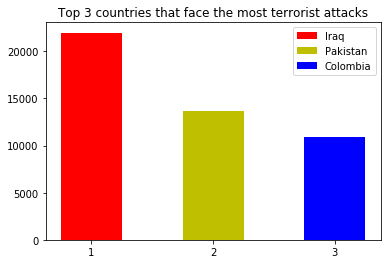

In [64]:
data2 = np.genfromtxt('gtd.csv', skip_header=1, delimiter=',', usecols=(8), dtype=None, filling_values=1)
#print(data2)
a = Counter(data2)
#a.most_common()
b = sorted(a.items(), key=lambda pair: pair[1], reverse=True)
#print(b)

#v.1.0
#X = [Iraq,Pakistan,India,Colombia,Philippines,Peru,ElSalvador,UK,Spain,US]
#Y = [21978,13620,10947,8123,6202,6088,5320,5091,3243,2721]
#N = 10
#ind = np.arange(N)  # the x locations for the groups
#width = 0.5    # the width of the bars
#fig, ax = plt.subplots()
#rects1 = ax.bar(ind, Y, width, color='r')
#ax.set_xticks(ind)
#ax.set_xticklabels(('Iraq','Pakistan','India','Colombia','Philippines','Peru','ElSalvador','UK','Spain','US'))
#plt.show()

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.5    # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(1, 21978, width, color='r')
rects2 = ax.bar(2, 13620, width, color='y')
rects3 = ax.bar(3, 10947, width, color='b')

ax.set_xticks([1,2,3])
ax.set_title('Top 3 countries that face the most terrorist attacks')
ax.legend((rects1[0], rects2[0], rects3[0]), ('Iraq', 'Pakistan','Colombia'))
plt.show()


/Users/michalinaprawda/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5,1,'Terorism per year')

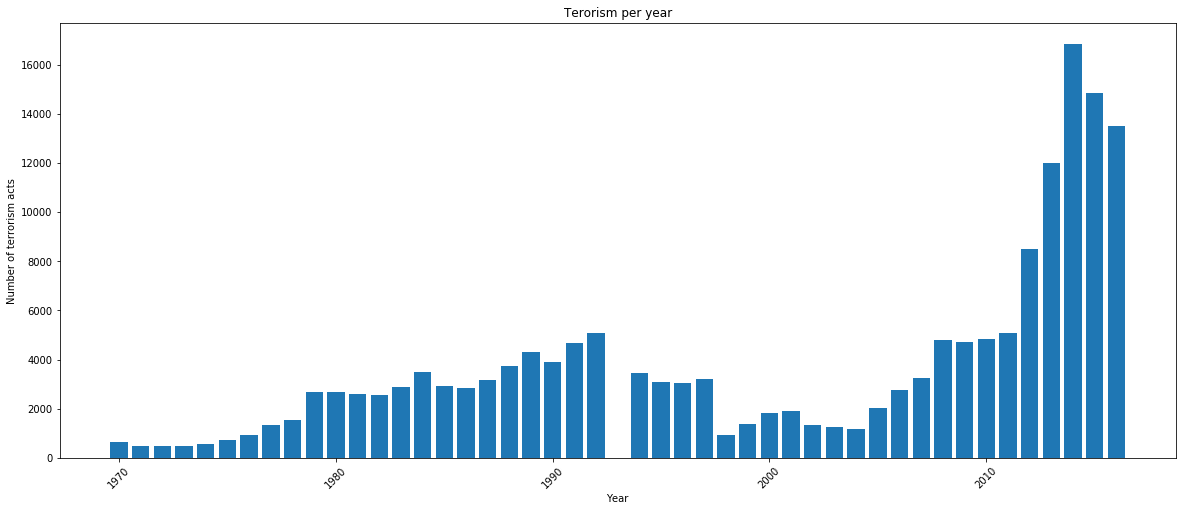

In [58]:
#Has the amount of attacks increased during recent years
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df =pd.read_csv("gtd.csv", encoding='ISO-8859-1')

count_year = df.groupby(['iyear']).count()

plt.figure(figsize = (20,8))
plt.bar(count_year.index, count_year.eventid)
plt.ylabel('Number of terrorism acts')
plt.xlabel('Year')
plt.xticks(rotation =45)
plt.title('Terorism per year')


Text(0.5,1,'Type of attack')

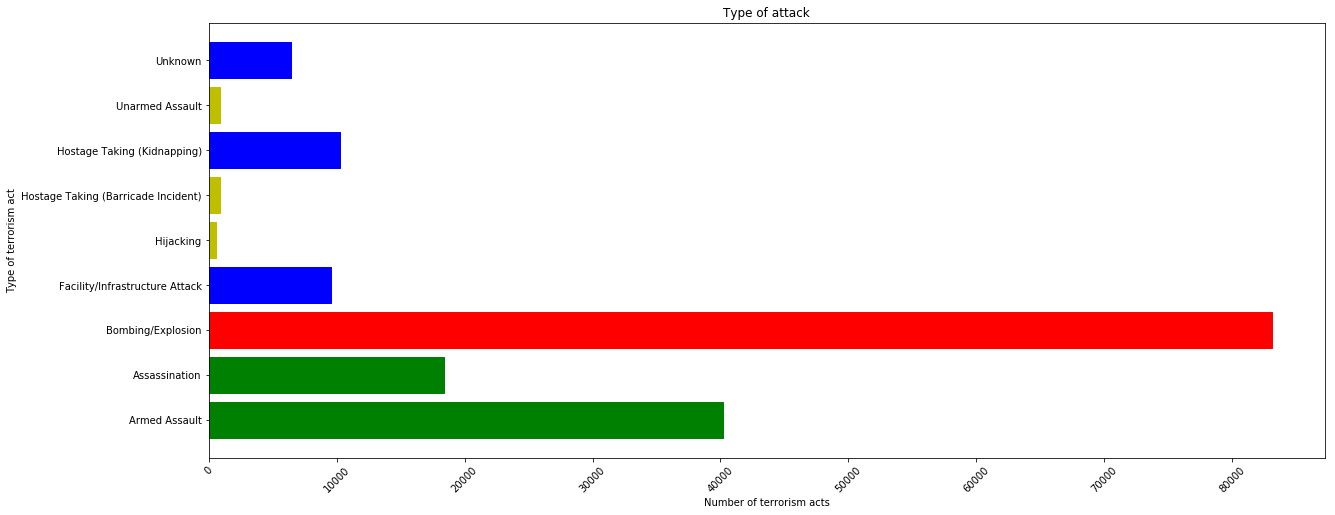

In [59]:
count_type = df.groupby(['attacktype1_txt']).count()

plt.figure(figsize = (20,8))
barlist = plt.barh(count_type.index, count_type.eventid)
barlist[0].set_color('g')
barlist[1].set_color('g')
barlist[2].set_color('r')
barlist[3].set_color('b')
barlist[4].set_color('y')
barlist[5].set_color('y')
barlist[6].set_color('b')
barlist[7].set_color('y')
barlist[8].set_color('b')
plt.ylabel('Type of terrorism act')
plt.xlabel('Number of terrorism acts')
plt.xticks(rotation =45)
plt.title('Type of attack')

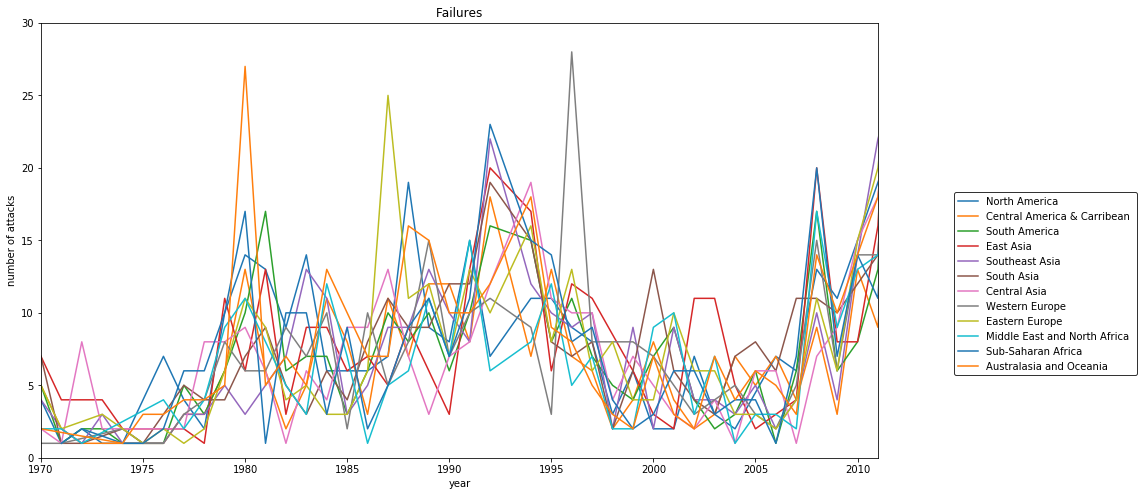

In [60]:
#What is the rate of failures of attacks per region
region_dictionary = {1: 'North America', 2: 'Central America & Carribean', 3: 'South America',
                     4: 'East Asia', 5: 'Southeast Asia', 6: 'South Asia', 7: 'Central Asia',
                     8: 'Western Europe', 9: 'Eastern Europe', 10: 'Middle East and North Africa',
                     11: 'Sub-Saharan Africa', 12: 'Australasia and Oceania'}

def multi_graph(result,result_list, xmin, xmax, ymin, ymax):
    fig2, ax2 = plt.subplots(figsize = (15,8))
    number = 1 #the for-loop in append_list processes the regions in order from 1 to 12
    for j in result_list:
        ax2.plot(j.index, j.eventid, label = '%s ' % region_dictionary[number] )
        number += 1

    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.xlabel('year')
    plt.ylabel('number of attacks')
    plt.title(result)
    ax2.legend(loc = 'center', frameon = True, edgecolor = 'black',bbox_to_anchor =(1.2,0.4))


success_list = []
failure_list = []

for i in region_dictionary:
    region_data = df[(df.iday == i)]
  
    region_data_failure = region_data[(region_data.success == 0)]
    region_grouped_failure = region_data_failure.groupby('iyear').count()

    failure_list.append(region_grouped_failure)

multi_graph('Failures',failure_list, 1970, 2011, 0, 30)

Text(0.5,1,'Terorism per region')

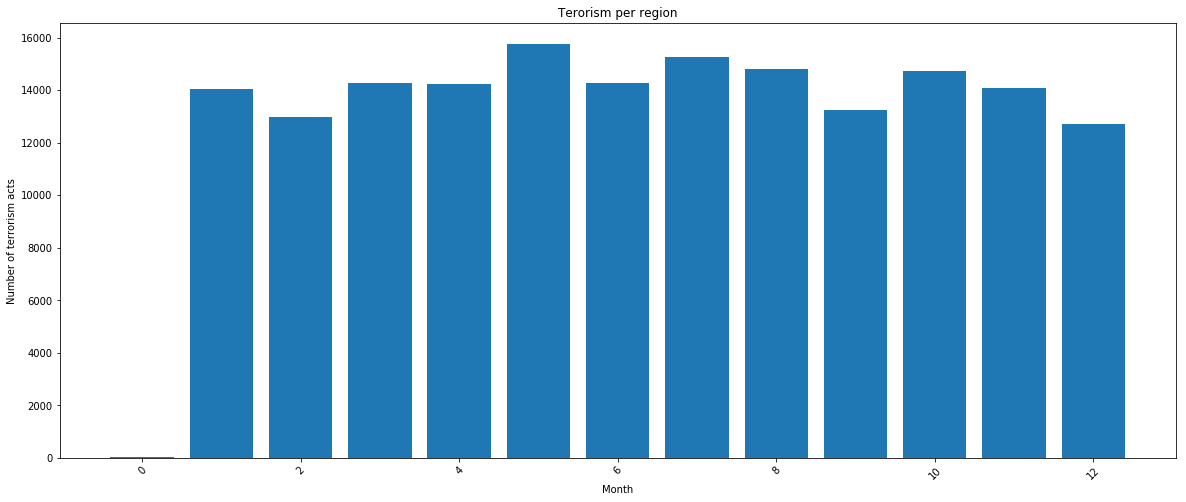

In [61]:

count_month = df.groupby(['imonth']).count()

plt.figure(figsize = (20,8))
plt.bar(count_month.index, count_month.eventid)
plt.ylabel('Number of terrorism acts')
plt.xlabel('Month')
plt.xticks(rotation =45)
plt.title('Terorism per region')

Text(0.5,1,'Terorism per day')

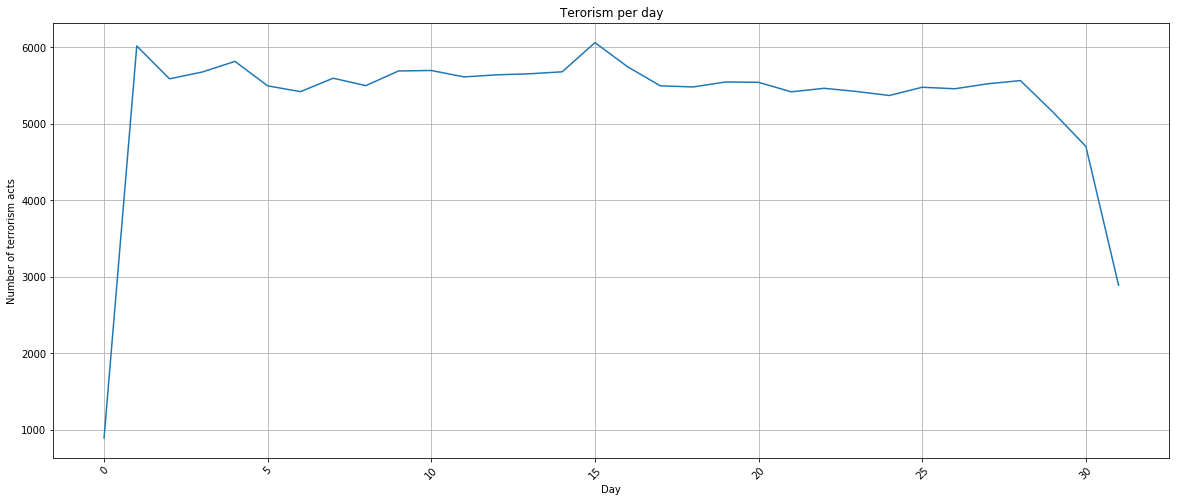

In [62]:
count_iday = df.groupby(['iday']).count()

plt.figure(figsize = (20,8))
plt.plot(count_iday.index, count_iday.eventid)
plt.grid(True)
plt.ylabel('Number of terrorism acts')
plt.xlabel('Day')
plt.xticks(rotation =45)
plt.title('Terorism per day')